In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline
from my_plot import set_size
import seaborn as sns
width =  508.0
widthcol = 244
plt.rcParams['font.size']=12

from matplotlib.ticker import LogLocator
%matplotlib widget

In [20]:
f =  ScalarFormatter(useOffset=False, useMathText=True)
f.set_scientific(True)
f.set_powerlimits((0, 0))

def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        coefficient=float(coefficient)
        if (coefficient == 1.00):
            return f"$ 10^{{{exponent}}}$"  # Notazione LaTeX
        else: 
            return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX

In [21]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.72548 #K

In [22]:
z1 = np.geomspace(1.0e+2,5.0e+6,500)

In [23]:
folder = 'outputs/fullgreen3/batch/PDE-non-linear/Greens'

z_vis= []
Jbb =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [4], delimiter=' ', header=None)
    Jbb.append(op.iat[0,10])
    z_vis.append(op.iat[0,1])

In [24]:
folder = 'outputs/full_gf_xe/batch/PDE-non-linear/Greens'

z_vis2= []
Jbb2 =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [4], delimiter=' ', header=None)
    Jbb2.append(op.iat[0,10])
    z_vis2.append(op.iat[0,1])

In [25]:
folder = 'outputs/full_gf_hc/batch/PDE-non-linear/Greens'

z_vis3= []
Jbb3 =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [4], delimiter=' ', header=None)
    Jbb3.append(op.iat[0,10])
    z_vis3.append(op.iat[0,1])

In [26]:
folder = 'outputs/full_gf_hcxe/batch/PDE-non-linear/Greens'

z_vis4= []
Jbb4 =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [4], delimiter=' ', header=None)
    Jbb4.append(op.iat[0,10])
    z_vis4.append(op.iat[0,1])

In [27]:
#test the new setup with the option CK4

folder = 'outputs/outputs-Greens-heating/batch/PDE-non-linear/Greens'

z_vis_heat= []
Jbb_heat =[]

for i in range (500):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_{i+1}.dat")


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [7,19], delimiter=' ', header=None)
    Jbb_heat.append(op.iat[1,1])
    z_vis_heat.append(op.iat[0,2])

J_spl_heat = CubicSpline(z_vis_heat, Jbb_heat) 

In [28]:

folder = 'outputs/outputs-Greens-CK4/batch/PDE-non-linear/Greens'

z_visCk4= []
Jbb_Ck4 =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_{i+1}.dat")


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [7,19], delimiter=' ', header=None)
    Jbb_Ck4.append(op.iat[1,1])
    z_visCk4.append(op.iat[0,2])

J_spl_Ck4 = CubicSpline(z_visCk4, Jbb_Ck4) 

In [29]:

folder = 'outputs/outputs-Greens-1e6/batch/PDE-non-linear/Greens'

z_vis1e6= []
Jbb_1e6 =[]

for i in range (250):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_{i+1}.dat")


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [7,19], delimiter=' ', header=None)
    Jbb_1e6.append(op.iat[1,1])
    z_vis1e6.append(op.iat[0,2])

J_spl_1e6 = CubicSpline(z_vis1e6, Jbb_1e6) 

In [30]:

folder = 'outputs/outputs-Greens-1e7/batch/PDE-non-linear/Greens'

z_vis1e7= []
Jbb_1e7 =[]

for i in range (250):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_Greens_z_h_{i+1}.dat")


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [7,19], delimiter=' ', header=None)
    Jbb_1e7.append(op.iat[1,1])
    z_vis1e7.append(op.iat[0,2])

J_spl_1e7 = CubicSpline(z_vis1e7, Jbb_1e7) 

In [31]:
Jref= lambda x:  np.exp(-(x/1.98e+6)**(5/2)) 
z_vis = np.array(z_vis)

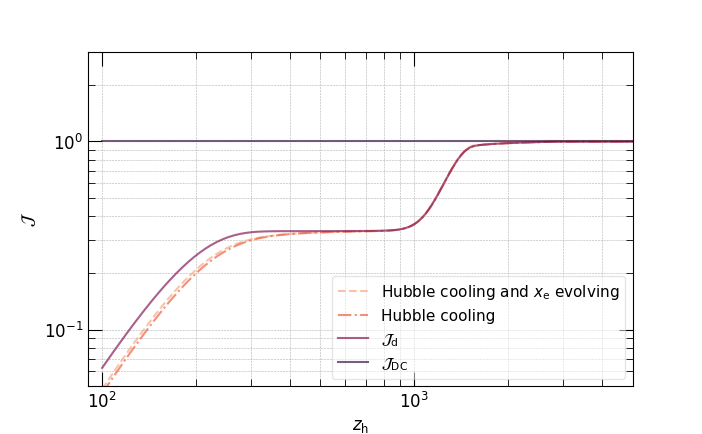

In [32]:
#Plot using the output and not my function integrated
colors2=sns.color_palette("rocket",5) #also nice
lines =  ['-', '--', '-.', ':']

Jbb = np.array(Jbb)
fig, ax = plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Late time visibility function with hubble cooling ")

ax.plot(z_vis4, Jbb4, color = colors2[4], label= "Hubble cooling and $x_{\\rm e}$ evolving", alpha = 0.7, linestyle = lines[1])
#ax.plot(z_vis, -Jbb2, color = "purple",linestyle = "dashed")

ax.plot(z_vis3, Jbb3, color = colors2[3], label= "Hubble cooling", alpha = 0.7,linestyle = lines[2])
#ax.plot(z_vis, -Jbb2, color = "purple",linestyle = "dashed")

#ax.plot(z_vis2, Jbb2, color = colors2[2], label= "$x_{\\rm e}$ evolving", alpha = 0.7,linestyle = lines[3])
#ax.plot(z_vis, -Jbb2, color = "purple",linestyle = "dashed")

ax.plot(z_vis, Jbb, color = colors2[1], label= "$\mathcal{J}_{\\rm d}$", alpha = 0.7,linestyle = lines[0])
#ax.plot(z_vis, -Jbb, color = "purple",linestyle = "dashed")

ax.plot(z_vis, Jref(z_vis), color = colors2[0],label="$\mathcal{J}_{\mathrm{\\rm DC}}$", alpha = 0.7,linestyle = lines[0])
#ax.plot(z_vis, -Jref(z_vis), color = "black",linestyle = "dashed")



ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([90, 5e3])
ax.set_ylim([5e-2, 3])

#ax1.set_title("All $\Delta$ I_N curves")

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax.set_ylabel("$\mathcal{J}$")
ax.set_xlabel("$z_{\mathrm{h}}$")

ax.grid(True, which = 'both',  linestyle='--', linewidth=0.4)

#ax1.yaxis.set_major_formatter(ScalarFormatter())    
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
ax.legend(fontsize = 11,fancybox=True, framealpha=0.5)
plt.savefig('outputs/p4p/fullJbb_comparison.pdf', dpi=300,bbox_inches="tight")
plt.show()

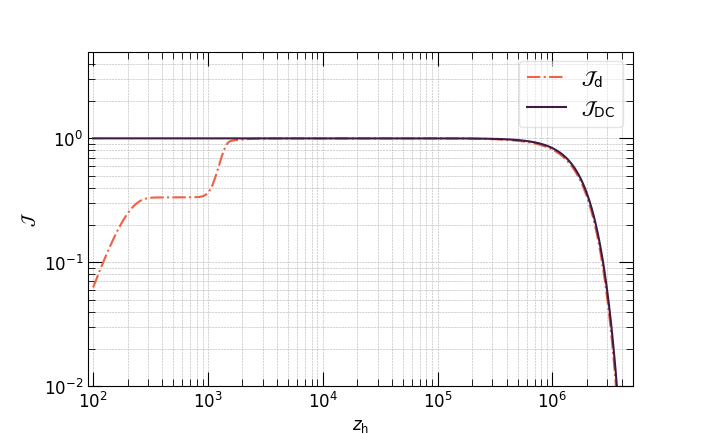

In [33]:
#Plot using the output and not my function integrated
colors2=sns.color_palette("rocket",5) #also nice
lines =  ['-', '--', '-.', ':']

Jbb = np.array(Jbb)
fig, ax = plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Late time visibility function with hubble cooling ")

#ax.plot(z_vis4, Jbb4, color = colors2[4], label= "Hubble cooling and $x_{\\rm e}$ evolving", alpha = 0.7, linestyle = lines[1])
##ax.plot(z_vis, -Jbb2, color = "purple",linestyle = "dashed")
#
#ax.plot(z_vis3, Jbb3, color = colors2[3], label= "Hubble cooling", alpha = 0.7,linestyle = lines[2])
##ax.plot(z_vis, -Jbb2, color = "purple",linestyle = "dashed")
#
#ax.plot(z_vis2, Jbb2, color = colors2[2], label= "$x_{\\rm e}$ evolving", alpha = 0.7,linestyle = lines[3])
#ax.plot(z_vis, -Jbb2, color = "purple",linestyle = "dashed")

ax.plot(z_vis, Jbb, color = colors2[3], label= "$\mathcal{J}_{\\rm d}$", linestyle = lines[2])
#ax.plot(z_vis, -Jbb, color = "purple",linestyle = "dashed")

#ax.plot(z_vis_heat, Jbb_heat, color = colors2[2], label= "Heating", linestyle = lines[1])

ax.plot(z_vis, Jref(z_vis), color = colors2[0],label="$\mathcal{J}_{\mathrm{\\rm DC}}$", linestyle = lines[0])
#ax.plot(z_vis, -Jref(z_vis), color = "black",linestyle = "dashed")





ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([90, 5e6])
ax.set_ylim([1e-2, 5])

#ax1.set_title("All $\Delta$ I_N curves")

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax.set_ylabel("$\mathcal{J}$")
ax.set_xlabel("$z_{\mathrm{h}}$")

ax.grid(True, which = 'both',  linestyle='--', linewidth=0.4)

#ax1.yaxis.set_major_formatter(ScalarFormatter())    
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
ax.legend(fontsize = 14,fancybox=True, framealpha=0.5)
plt.savefig('outputs/p4p/fullJbb.pdf', dpi=300,bbox_inches="tight")
plt.show()

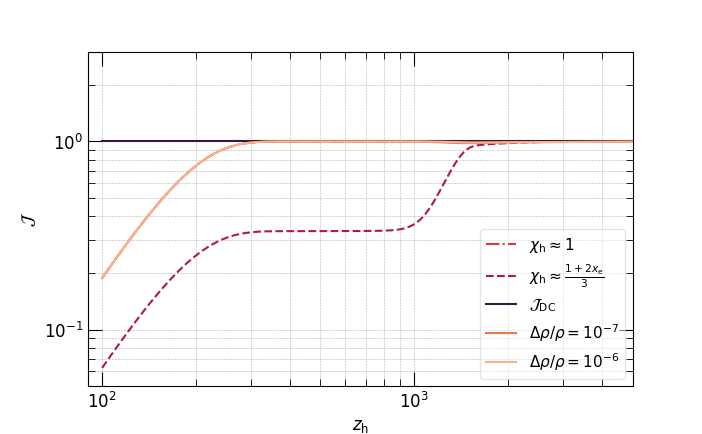

In [34]:
#Plot using the output and not my function integrated
colors2=sns.color_palette("rocket",6) #also nice
lines =  ['-', '--', '-.']

Jbb = np.array(Jbb)
fig, ax = plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Late time visibility function with hubble cooling ")


ax.plot(z_vis_heat, Jbb_heat, color = colors2[3], label= "$\chi_{\\rm h} \\approx 1$", linestyle = lines[2])
#ax.plot(z_vis, -Jbb2, color = "purple",linestyle = "dashed")

ax.plot(z_visCk4, Jbb_Ck4, color = colors2[2], label= "$\chi_{\\rm h} \\approx \\frac{1+2 x_{\\rm e}}{3}$", linestyle = lines[1])
#ax.plot(z_vis, -Jbb2, color = "purple",linestyle = "dashed")


ax.plot(z_vis, Jref(z_vis), color = colors2[0],label="$\mathcal{J}_{\mathrm{\\rm DC}}$", linestyle = lines[0])
#ax.plot(z_vis, -Jref(z_vis), color = "black",linestyle = "dashed")

ax.plot(z_vis1e7, Jbb_1e7, color = colors2[4],label="$\Delta \\rho/\\rho = 10^{-7}$", linestyle = lines[0])
ax.plot(z_vis1e6, Jbb_1e6, color = colors2[5],label="$\Delta \\rho/\\rho = 10^{-6}$", linestyle = lines[0])


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([90, 5e3])
ax.set_ylim([5e-2, 3])

#ax1.set_title("All $\Delta$ I_N curves")

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax.set_ylabel("$\mathcal{J}$")
ax.set_xlabel("$z_{\mathrm{h}}$")

ax.grid(True, which = 'both',  linestyle='--', linewidth=0.4)

#ax1.yaxis.set_major_formatter(ScalarFormatter())    
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
ax.legend(fontsize = 11,fancybox=True, framealpha=0.5)
plt.savefig('outputs/p4p/fullJbb_comparison_branching.pdf', dpi=300,bbox_inches="tight")
plt.show()